# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = pd.read_csv(url, names=names)
data.head(5)

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = None, max_depth = 20, min_samples_leaf = 1)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

Print accuracy of training and validation data.

In [ ]:
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  69.10569105691057


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree_ld = DecisionTreeClassifier(criterion='entropy', random_state = None, max_depth = 3, min_samples_leaf = 20)

decision_tree_ld.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred_ld=decision_tree_ld.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_ld)*100)
y_val_pred_ld=decision_tree_ld.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_ld)*100)

Training Accuracy is  78.41140529531569
Validation Accuracy is  72.35772357723577


Explain the accuracy results below. 

The model with a high max depth and low min. sample leaves had a higher training accuracy and lower validation accuracy because it overfit to the data. For the second model, there are not enough decision nodes, which explains both the low training and validation accuracy.

## Metrics

Plot the ROC curve and print the AUC of the second model.

0.7998306041784302


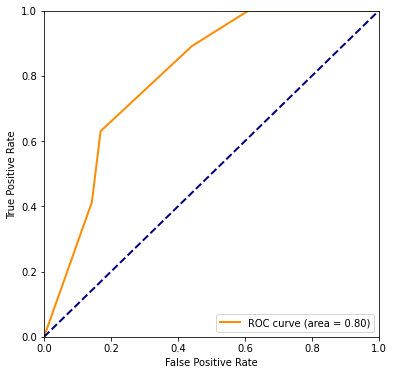

In [ ]:
labels = [0,1]
y_val_prob = decision_tree_ld.predict_proba(X_val,labels)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

roc_auc = metrics.auc(fpr, tpr)

print(roc_auc)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

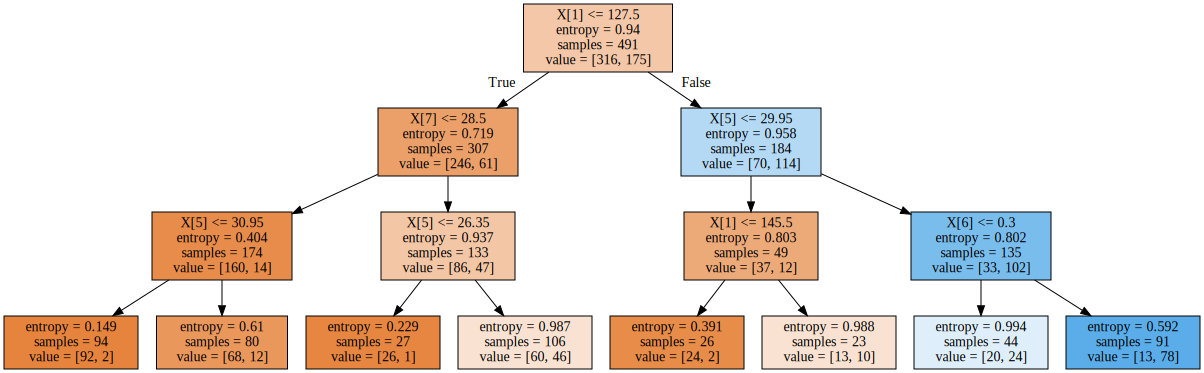

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree_ld, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

In [ ]:
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Question 1: What do you think X[n] represents in the nodes from the graph?

X[n] reprsents a column in the data set. The values in the column are compared to a number that is chosen to best separate the data at that node into the smaller nodes.

Question 2: What is the root feature? Does it make sense as the root feature?

The root feature is 'plas', which has the biggest variety across the data set, so it makes sense to use it first.

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

It would have excellent training accuracy but bad test accuracy because the model would be overfit to the training data.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
## YOUR CODE HERE
decision_tree_hd = DecisionTreeClassifier(criterion='entropy', random_state = None, max_depth = 500, min_samples_leaf = 1)

decision_tree_hd.fit(X_train, y_train)

y_train_pred_hd=decision_tree_hd.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_hd)*100)
y_val_pred_hd=decision_tree_hd.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_hd)*100)

Training Accuracy is  100.0
Validation Accuracy is  64.22764227642277


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred_f=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_f)*100)
y_val_pred_f=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_f)*100)

Training Accuracy is  100.0
Validation Accuracy is  77.23577235772358


How did the accuracy compare to the decision tree's accuracy?

There was a smaller gap between the training and validation accuracies. The accuracy overall was better as well.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
## YOUR CODE HERE
values = []
# print(random_forest.feature_importances_)
for i, importance in enumerate(random_forest.feature_importances_):
    values.append([importance,i])
values = sorted(values, reverse=True)
# print(values) 
for i in range(3):
    print(data.columns[values[i][1]])

plas
mass
age


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

In [ ]:
count

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

Training Accuracy is  87.57637474541752
Validation Accuracy is  60.16260162601627
Training Accuracy is  97.14867617107943
Validation Accuracy is  72.35772357723577
Training Accuracy is  98.98167006109979
Validation Accuracy is  78.04878048780488
Training Accuracy is  99.18533604887983
Validation Accuracy is  73.98373983739837
Training Accuracy is  99.38900203665987
Validation Accuracy is  81.30081300813008
Training Accuracy is  100.0
Validation Accuracy is  78.04878048780488
Training Accuracy is  100.0
Validation Accuracy is  73.98373983739837
Training Accuracy is  99.79633401221996
Validation Accuracy is  75.60975609756098
Training Accuracy is  100.0
Validation Accuracy is  78.86178861788618
Training Accuracy is  99.79633401221996
Validation Accuracy is  76.42276422764228
Training Accuracy is  100.0
Validation Accuracy is  79.67479674796748
Training Accuracy is  100.0
Validation Accuracy is  73.17073170731707
Training Accuracy is  100.0
Validation Accuracy is  78.86178861788618
Traini

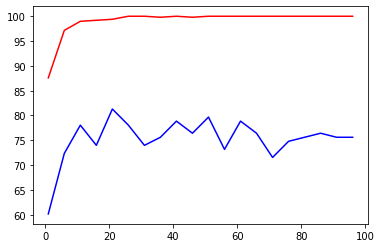

In [ ]:
## YOUR CODE HERE
count = np.arange(1,100, 5)
train_accuracies = []
validation_accuracies = []
for i in count:
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    y_train_pred_f = random_forest.predict(X_train)
    print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_f)*100)
    train_accuracies.append(accuracy_score(y_train, y_train_pred_f)*100)
    y_val_pred_f=random_forest.predict(X_val)
    print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_f)*100)
    validation_accuracies.append(accuracy_score(y_val,y_val_pred_f)*100)
#print(train_accuracies)
#print(validation_accuracies)

plt.plot(count, train_accuracies, 'r-', count, validation_accuracies, 'b-')
plt.show()

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

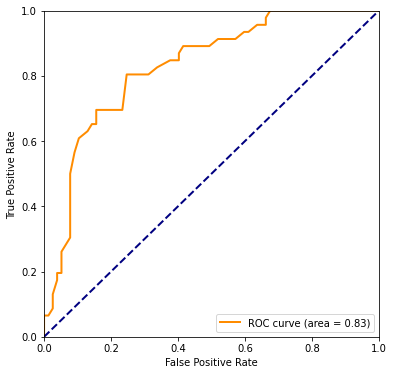

In [ ]:
## YOUR CODE HERE

y_val_prob = random_forest.predict_proba(X_val)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

roc_auc = metrics.auc(fpr, tpr)

#print(roc_auc)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d2fcc772-6148-4c0e-8b14-5e61b4e33ffd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>